# **Perform text cleaning, perform lemmatization (any method), remove stop words (any method), label encoding. Create representations using TF-IDF. Save outputs.**

In [83]:
#Importing Libraries

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import seaborn as sns

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
data_folder = "your datset folder path"
folders = ["business","entertainment","politics","sport","tech"]

In [86]:
import os
x = []
y = []

os.chdir(data_folder)

for i in folders:
    files = os.listdir(i)
    for text_file in files:
        file_path = i + "/" +text_file
        print("reading file:", file_path)
        with open(file_path) as f:
            data = f.readlines()
        data = ' '.join(data)
        x.append(data)
        y.append(i)
   
data = {'news': x, 'type': y}       
df = pd.DataFrame(data)
print('writing csv flie ...')
df.to_csv('your csv file path', index=False)

reading file: business/011.txt
reading file: business/289.txt
reading file: business/402.txt
reading file: business/350.txt
reading file: business/113.txt
reading file: business/266.txt
reading file: business/457.txt
reading file: business/252.txt
reading file: business/302.txt
reading file: business/486.txt
reading file: business/186.txt
reading file: business/105.txt
reading file: business/202.txt
reading file: business/031.txt
reading file: business/356.txt
reading file: business/091.txt
reading file: business/115.txt
reading file: business/023.txt
reading file: business/422.txt
reading file: business/007.txt
reading file: business/271.txt
reading file: business/068.txt
reading file: business/470.txt
reading file: business/129.txt
reading file: business/052.txt
reading file: business/255.txt
reading file: business/312.txt
reading file: business/243.txt
reading file: business/099.txt
reading file: business/090.txt
reading file: business/051.txt
reading file: business/116.txt
reading 

In [87]:
df

,news,type
0,Ask Jeeves tips online ad revival\n \n Ask Jee...,business
1,UK economy facing 'major risks'\n \n The UK ma...,business
2,US interest rate rise expected\n \n US interes...,business
3,Dollar hits new low versus euro\n \n The US do...,business
4,Brussels raps mobile call charges\n \n The Eur...,business
...,...,...
2220,Digital UK driven by net and TV\n \n The UK's ...,tech
2221,Mobile music challenges 'iPod age'\n \n Nokia ...,tech
2222,Screensaver tackles spam websites\n \n Net use...,tech
2223,Court mulls file-sharing future\n \n Judges at...,tech


**Data Visualization**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


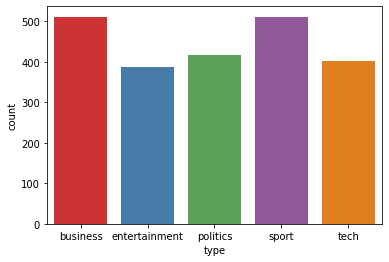

In [88]:
sns.countplot(df.type,palette="Set1")

In [89]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Visualizing Stop Words in the dataset

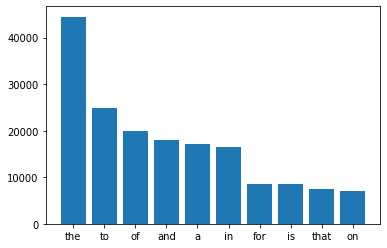

In [90]:
import matplotlib.pyplot as plt
def plot_stopwords(data):
    stop=set(stopwords.words('english'))
    data_split= data.str.split()
    data_list=data_split.values.tolist()
    corpus=[word for i in data_list for word in i]
    from collections import defaultdict
    dictionary_stopwords=defaultdict(int)
    for word in corpus:
        if word in stop:
            dictionary_stopwords[word]+=1
            
    top=sorted(dictionary_stopwords.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)
plot_stopwords(df['news'])

# Test Cleaning and Basic Preprocessing

**Removing Punctuation**

In [91]:
df['news_cleaned'] = df['news'].str.replace('[^\w\s]','')
df['news_cleaned'] = df['news_cleaned'].str.replace("\n", " ")

<ipython-input-91-d99f797b28ac>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['news_cleaned'] = df['news'].str.replace('[^\w\s]','')


In [92]:
df

,news,type,news_cleaned
0,Ask Jeeves tips online ad revival\n \n Ask Jee...,business,Ask Jeeves tips online ad revival Ask Jeeve...
1,UK economy facing 'major risks'\n \n The UK ma...,business,UK economy facing major risks The UK manufa...
2,US interest rate rise expected\n \n US interes...,business,US interest rate rise expected US interest ...
3,Dollar hits new low versus euro\n \n The US do...,business,Dollar hits new low versus euro The US doll...
4,Brussels raps mobile call charges\n \n The Eur...,business,Brussels raps mobile call charges The Europ...
...,...,...,...
2220,Digital UK driven by net and TV\n \n The UK's ...,tech,Digital UK driven by net and TV The UKs ado...
2221,Mobile music challenges 'iPod age'\n \n Nokia ...,tech,Mobile music challenges iPod age Nokia and ...
2222,Screensaver tackles spam websites\n \n Net use...,tech,Screensaver tackles spam websites Net users...
2223,Court mulls file-sharing future\n \n Judges at...,tech,Court mulls filesharing future Judges at th...


**Lowercasing**

In [93]:
df['news_lowercased'] = df['news_cleaned'].str.lower()

In [94]:
df

,news,type,news_cleaned,news_lowercased
0,Ask Jeeves tips online ad revival\n \n Ask Jee...,business,Ask Jeeves tips online ad revival Ask Jeeve...,ask jeeves tips online ad revival ask jeeve...
1,UK economy facing 'major risks'\n \n The UK ma...,business,UK economy facing major risks The UK manufa...,uk economy facing major risks the uk manufa...
2,US interest rate rise expected\n \n US interes...,business,US interest rate rise expected US interest ...,us interest rate rise expected us interest ...
3,Dollar hits new low versus euro\n \n The US do...,business,Dollar hits new low versus euro The US doll...,dollar hits new low versus euro the us doll...
4,Brussels raps mobile call charges\n \n The Eur...,business,Brussels raps mobile call charges The Europ...,brussels raps mobile call charges the europ...
...,...,...,...,...
2220,Digital UK driven by net and TV\n \n The UK's ...,tech,Digital UK driven by net and TV The UKs ado...,digital uk driven by net and tv the uks ado...
2221,Mobile music challenges 'iPod age'\n \n Nokia ...,tech,Mobile music challenges iPod age Nokia and ...,mobile music challenges ipod age nokia and ...
2222,Screensaver tackles spam websites\n \n Net use...,tech,Screensaver tackles spam websites Net users...,screensaver tackles spam websites net users...
2223,Court mulls file-sharing future\n \n Judges at...,tech,Court mulls filesharing future Judges at th...,court mulls filesharing future judges at th...


**Removing Stopwords**

In [95]:
# Using nltk to remove stopwords
stopwords = nltk.corpus.stopwords.words('english')

In [96]:
len(stopwords)

179

In [97]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [98]:
df['news_without_stopwords_method1'] = df['news_lowercased'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [99]:
df

,news,type,news_cleaned,news_lowercased,news_without_stopwords_method1
0,Ask Jeeves tips online ad revival\n \n Ask Jee...,business,Ask Jeeves tips online ad revival Ask Jeeve...,ask jeeves tips online ad revival ask jeeve...,ask jeeves tips online ad revival ask jeeves b...
1,UK economy facing 'major risks'\n \n The UK ma...,business,UK economy facing major risks The UK manufa...,uk economy facing major risks the uk manufa...,uk economy facing major risks uk manufacturing...
2,US interest rate rise expected\n \n US interes...,business,US interest rate rise expected US interest ...,us interest rate rise expected us interest ...,us interest rate rise expected us interest rat...
3,Dollar hits new low versus euro\n \n The US do...,business,Dollar hits new low versus euro The US doll...,dollar hits new low versus euro the us doll...,dollar hits new low versus euro us dollar cont...
4,Brussels raps mobile call charges\n \n The Eur...,business,Brussels raps mobile call charges The Europ...,brussels raps mobile call charges the europ...,brussels raps mobile call charges european com...
...,...,...,...,...,...
2220,Digital UK driven by net and TV\n \n The UK's ...,tech,Digital UK driven by net and TV The UKs ado...,digital uk driven by net and tv the uks ado...,digital uk driven net tv uks adoption digital ...
2221,Mobile music challenges 'iPod age'\n \n Nokia ...,tech,Mobile music challenges iPod age Nokia and ...,mobile music challenges ipod age nokia and ...,mobile music challenges ipod age nokia microso...
2222,Screensaver tackles spam websites\n \n Net use...,tech,Screensaver tackles spam websites Net users...,screensaver tackles spam websites net users...,screensaver tackles spam websites net users ge...
2223,Court mulls file-sharing future\n \n Judges at...,tech,Court mulls filesharing future Judges at th...,court mulls filesharing future judges at th...,court mulls filesharing future judges us supre...


In [100]:
df.loc[1]['news_without_stopwords_method1']

'uk economy facing major risks uk manufacturing sector continue face serious challenges next two years british chamber commerce bcc said groups quarterly survey companies found exports picked last three months 2004 best levels eight years rise came despite exchange rates cited major concern however bcc found whole uk economy still faced major risks warned growth set slow recently forecast economic growth slow 3 2004 little 25 2005 2006 manufacturers domestic sales growth fell back slightly quarter survey 5196 firms found employment manufacturing also fell job expectations lowest level year despite positive news export sector worrying signs manufacturing bcc said results reinforce concern sectors persistent inability sustain recovery outlook service sector uncertain despite increase exports orders quarter bcc noted bcc found confidence increased quarter across manufacturing service sectors although overall failed reach levels start 2004 reduced threat interest rate increases contributed

In [101]:
stop_list_final=[]
nrows = len(df)
stopwords_english = stopwords

for row in range(0, nrows):
    
    # Create an empty list containing no stop words
    stop_list = []
    
    # Save the text and its words into an object
    text = df.loc[row]['news_lowercased']
    text_words = text.split(" ")

    # Iterate through every word to remove stopwords
    for word in text_words:
        if (word not in stopwords_english): 
          stop_list.append(word)
        
    # Join the list
    stop_text = " ".join(stop_list)
    
    # Append to the list containing the texts
    stop_list_final.append(stop_text)

df['news_without_stopwords_method2'] = stop_list_final   

In [102]:
df

,news,type,news_cleaned,news_lowercased,news_without_stopwords_method1,news_without_stopwords_method2
0,Ask Jeeves tips online ad revival\n \n Ask Jee...,business,Ask Jeeves tips online ad revival Ask Jeeve...,ask jeeves tips online ad revival ask jeeve...,ask jeeves tips online ad revival ask jeeves b...,ask jeeves tips online ad revival ask jeeve...
1,UK economy facing 'major risks'\n \n The UK ma...,business,UK economy facing major risks The UK manufa...,uk economy facing major risks the uk manufa...,uk economy facing major risks uk manufacturing...,uk economy facing major risks uk manufactur...
2,US interest rate rise expected\n \n US interes...,business,US interest rate rise expected US interest ...,us interest rate rise expected us interest ...,us interest rate rise expected us interest rat...,us interest rate rise expected us interest ...
3,Dollar hits new low versus euro\n \n The US do...,business,Dollar hits new low versus euro The US doll...,dollar hits new low versus euro the us doll...,dollar hits new low versus euro us dollar cont...,dollar hits new low versus euro us dollar c...
4,Brussels raps mobile call charges\n \n The Eur...,business,Brussels raps mobile call charges The Europ...,brussels raps mobile call charges the europ...,brussels raps mobile call charges european com...,brussels raps mobile call charges european ...
...,...,...,...,...,...,...
2220,Digital UK driven by net and TV\n \n The UK's ...,tech,Digital UK driven by net and TV The UKs ado...,digital uk driven by net and tv the uks ado...,digital uk driven net tv uks adoption digital ...,digital uk driven net tv uks adoption digit...
2221,Mobile music challenges 'iPod age'\n \n Nokia ...,tech,Mobile music challenges iPod age Nokia and ...,mobile music challenges ipod age nokia and ...,mobile music challenges ipod age nokia microso...,mobile music challenges ipod age nokia micr...
2222,Screensaver tackles spam websites\n \n Net use...,tech,Screensaver tackles spam websites Net users...,screensaver tackles spam websites net users...,screensaver tackles spam websites net users ge...,screensaver tackles spam websites net users...
2223,Court mulls file-sharing future\n \n Judges at...,tech,Court mulls filesharing future Judges at th...,court mulls filesharing future judges at th...,court mulls filesharing future judges us supre...,court mulls filesharing future judges us su...


**Rearranging the columns after preprocessing**

In [103]:
list_columns = ["news", "type", "news_without_stopwords_method2"]
df = df[list_columns]

df = df.rename(columns={'news_without_stopwords_method2': 'News_Cleaned'})

In [104]:
df

,news,type,News_Cleaned
0,Ask Jeeves tips online ad revival\n \n Ask Jee...,business,ask jeeves tips online ad revival ask jeeve...
1,UK economy facing 'major risks'\n \n The UK ma...,business,uk economy facing major risks uk manufactur...
2,US interest rate rise expected\n \n US interes...,business,us interest rate rise expected us interest ...
3,Dollar hits new low versus euro\n \n The US do...,business,dollar hits new low versus euro us dollar c...
4,Brussels raps mobile call charges\n \n The Eur...,business,brussels raps mobile call charges european ...
...,...,...,...
2220,Digital UK driven by net and TV\n \n The UK's ...,tech,digital uk driven net tv uks adoption digit...
2221,Mobile music challenges 'iPod age'\n \n Nokia ...,tech,mobile music challenges ipod age nokia micr...
2222,Screensaver tackles spam websites\n \n Net use...,tech,screensaver tackles spam websites net users...
2223,Court mulls file-sharing future\n \n Judges at...,tech,court mulls filesharing future judges us su...


# Lemmatization

In [105]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [106]:
wordnet_lemmatizer = WordNetLemmatizer()
nrows = len(df)
lemmatized_text_list = []

for row in range(0, nrows):
    
    # Create an empty list containing lemmatized words
    lemmatized_list = []
    
    # Save the text and its words into an object
    text = df.loc[row]['News_Cleaned']
    text_words = text.split(" ")

    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    
    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)

df['News_Cleaned_Lemmatized_Method1'] = lemmatized_text_list

In [107]:
df

,news,type,News_Cleaned,News_Cleaned_Lemmatized_Method1
0,Ask Jeeves tips online ad revival\n \n Ask Jee...,business,ask jeeves tips online ad revival ask jeeve...,ask jeeves tip online ad revival ask jeeves...
1,UK economy facing 'major risks'\n \n The UK ma...,business,uk economy facing major risks uk manufactur...,uk economy face major risk uk manufacture s...
2,US interest rate rise expected\n \n US interes...,business,us interest rate rise expected us interest ...,us interest rate rise expect us interest ra...
3,Dollar hits new low versus euro\n \n The US do...,business,dollar hits new low versus euro us dollar c...,dollar hit new low versus euro us dollar co...
4,Brussels raps mobile call charges\n \n The Eur...,business,brussels raps mobile call charges european ...,brussels rap mobile call charge european co...
...,...,...,...,...
2220,Digital UK driven by net and TV\n \n The UK's ...,tech,digital uk driven net tv uks adoption digit...,digital uk drive net tv uks adoption digita...
2221,Mobile music challenges 'iPod age'\n \n Nokia ...,tech,mobile music challenges ipod age nokia micr...,mobile music challenge ipod age nokia micro...
2222,Screensaver tackles spam websites\n \n Net use...,tech,screensaver tackles spam websites net users...,screensaver tackle spam websites net users ...
2223,Court mulls file-sharing future\n \n Judges at...,tech,court mulls filesharing future judges us su...,court mull filesharing future judge us supr...


In [108]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [109]:
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

nrows = len(df)
lemmatized_text_list = []

for row in range(0, nrows):
    lemmatized_text = lemmatize_sentence(df.loc[row]['News_Cleaned'])
    lemmatized_text_list.append(lemmatized_text)

df['News_Cleaned_Lemmatized_Method2'] = lemmatized_text_list   

In [110]:
df

,news,type,News_Cleaned,News_Cleaned_Lemmatized_Method1,News_Cleaned_Lemmatized_Method2
0,Ask Jeeves tips online ad revival\n \n Ask Jee...,business,ask jeeves tips online ad revival ask jeeve...,ask jeeves tip online ad revival ask jeeves...,ask jeeves tip online ad revival ask jeeves be...
1,UK economy facing 'major risks'\n \n The UK ma...,business,uk economy facing major risks uk manufactur...,uk economy face major risk uk manufacture s...,uk economy face major risk uk manufacturing se...
2,US interest rate rise expected\n \n US interes...,business,us interest rate rise expected us interest ...,us interest rate rise expect us interest ra...,us interest rate rise expect us interest rate ...
3,Dollar hits new low versus euro\n \n The US do...,business,dollar hits new low versus euro us dollar c...,dollar hit new low versus euro us dollar co...,dollar hit new low versus euro us dollar conti...
4,Brussels raps mobile call charges\n \n The Eur...,business,brussels raps mobile call charges european ...,brussels rap mobile call charge european co...,brussels rap mobile call charge european commi...
...,...,...,...,...,...
2220,Digital UK driven by net and TV\n \n The UK's ...,tech,digital uk driven net tv uks adoption digit...,digital uk drive net tv uks adoption digita...,digital uk drive net tv uks adoption digital t...
2221,Mobile music challenges 'iPod age'\n \n Nokia ...,tech,mobile music challenges ipod age nokia micr...,mobile music challenge ipod age nokia micro...,mobile music challenge ipod age nokia microsof...
2222,Screensaver tackles spam websites\n \n Net use...,tech,screensaver tackles spam websites net users...,screensaver tackle spam websites net users ...,screensaver tackle spam website net user get c...
2223,Court mulls file-sharing future\n \n Judges at...,tech,court mulls filesharing future judges us su...,court mull filesharing future judge us supr...,court mull filesharing future judge us supreme...


# Label Encoding

In [113]:
#import the LabelEncoder class

from sklearn.preprocessing import LabelEncoder

#Creating the object instance

label_encoder = LabelEncoder()

for i in df['type']:

    df['type_label_encoded'] = label_encoder.fit_transform(df['type'])

In [114]:
df

,news,type,News_Cleaned,News_Cleaned_Lemmatized_Method1,News_Cleaned_Lemmatized_Method2,type_label_encoded
0,Ask Jeeves tips online ad revival\n \n Ask Jee...,business,ask jeeves tips online ad revival ask jeeve...,ask jeeves tip online ad revival ask jeeves...,ask jeeves tip online ad revival ask jeeves be...,0
1,UK economy facing 'major risks'\n \n The UK ma...,business,uk economy facing major risks uk manufactur...,uk economy face major risk uk manufacture s...,uk economy face major risk uk manufacturing se...,0
2,US interest rate rise expected\n \n US interes...,business,us interest rate rise expected us interest ...,us interest rate rise expect us interest ra...,us interest rate rise expect us interest rate ...,0
3,Dollar hits new low versus euro\n \n The US do...,business,dollar hits new low versus euro us dollar c...,dollar hit new low versus euro us dollar co...,dollar hit new low versus euro us dollar conti...,0
4,Brussels raps mobile call charges\n \n The Eur...,business,brussels raps mobile call charges european ...,brussels rap mobile call charge european co...,brussels rap mobile call charge european commi...,0
...,...,...,...,...,...,...
2220,Digital UK driven by net and TV\n \n The UK's ...,tech,digital uk driven net tv uks adoption digit...,digital uk drive net tv uks adoption digita...,digital uk drive net tv uks adoption digital t...,4
2221,Mobile music challenges 'iPod age'\n \n Nokia ...,tech,mobile music challenges ipod age nokia micr...,mobile music challenge ipod age nokia micro...,mobile music challenge ipod age nokia microsof...,4
2222,Screensaver tackles spam websites\n \n Net use...,tech,screensaver tackles spam websites net users...,screensaver tackle spam websites net users ...,screensaver tackle spam website net user get c...,4
2223,Court mulls file-sharing future\n \n Judges at...,tech,court mulls filesharing future judges us su...,court mull filesharing future judge us supr...,court mull filesharing future judge us supreme...,4


# Creating representations using TF-IDF

In [120]:
#Generating new column for Category codes

news_category_codes = {
    'business': 0,
    'entertainment': 1,
    'politics': 2,
    'sport': 3,
    'tech': 4
}

# Category mapping
df['news_category_codes'] = df['type']
df = df.replace({'news_category_codes':news_category_codes})

In [121]:
df

,news,type,News_Cleaned,News_Cleaned_Lemmatized_Method1,News_Cleaned_Lemmatized_Method2,type_label_encoded,news_category_codes
0,Ask Jeeves tips online ad revival\n \n Ask Jee...,business,ask jeeves tips online ad revival ask jeeve...,ask jeeves tip online ad revival ask jeeves...,ask jeeves tip online ad revival ask jeeves be...,0,0
1,UK economy facing 'major risks'\n \n The UK ma...,business,uk economy facing major risks uk manufactur...,uk economy face major risk uk manufacture s...,uk economy face major risk uk manufacturing se...,0,0
2,US interest rate rise expected\n \n US interes...,business,us interest rate rise expected us interest ...,us interest rate rise expect us interest ra...,us interest rate rise expect us interest rate ...,0,0
3,Dollar hits new low versus euro\n \n The US do...,business,dollar hits new low versus euro us dollar c...,dollar hit new low versus euro us dollar co...,dollar hit new low versus euro us dollar conti...,0,0
4,Brussels raps mobile call charges\n \n The Eur...,business,brussels raps mobile call charges european ...,brussels rap mobile call charge european co...,brussels rap mobile call charge european commi...,0,0
...,...,...,...,...,...,...,...
2220,Digital UK driven by net and TV\n \n The UK's ...,tech,digital uk driven net tv uks adoption digit...,digital uk drive net tv uks adoption digita...,digital uk drive net tv uks adoption digital t...,4,4
2221,Mobile music challenges 'iPod age'\n \n Nokia ...,tech,mobile music challenges ipod age nokia micr...,mobile music challenge ipod age nokia micro...,mobile music challenge ipod age nokia microsof...,4,4
2222,Screensaver tackles spam websites\n \n Net use...,tech,screensaver tackles spam websites net users...,screensaver tackle spam websites net users ...,screensaver tackle spam website net user get c...,4,4
2223,Court mulls file-sharing future\n \n Judges at...,tech,court mulls filesharing future judges us su...,court mull filesharing future judge us supr...,court mull filesharing future judge us supreme...,4,4


In [116]:
X_train, X_test, y_train, y_test = train_test_split(df['News_Cleaned_Lemmatized_Method2'], 
                                                    df['type_label_encoded'], 
                                                    test_size=0.15, 
                                                    random_state=8)

In [117]:
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [118]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(1891, 300)
(334, 300)


In [123]:
from sklearn.feature_selection import chi2
import numpy as np

for Product, category_id in sorted(news_category_codes.items()):
    features_chi2 = chi2(features_train, labels_train == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names_out ())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

# 'business' category:
  . Most correlated unigrams:
. analyst
. economy
. oil
. growth
. bank
  . Most correlated bigrams:
. mr blair
. last year

# 'entertainment' category:
  . Most correlated unigrams:
. tv
. song
. star
. award
. film
  . Most correlated bigrams:
. mr blair
. prime minister

# 'politics' category:
  . Most correlated unigrams:
. blair
. party
. election
. tory
. labour
  . Most correlated bigrams:
. prime minister
. mr blair

# 'sport' category:
  . Most correlated unigrams:
. club
. season
. win
. match
. champion
  . Most correlated bigrams:
. mr blair
. say mr

# 'tech' category:
  . Most correlated unigrams:
. digital
. technology
. software
. computer
. user
  . Most correlated bigrams:
. mr blair
. say mr



In [124]:
bigrams

['tell bbc', 'last year', 'prime minister', 'mr blair', 'say mr']

# Saving Outputs

In [125]:
import pickle

In [127]:
# X_train
with open('your output folder path/X_train.pickle', 'wb') as output:
    pickle.dump(X_train, output)
    
# X_test    
with open('your output folder path/X_test.pickle', 'wb') as output:
    pickle.dump(X_test, output)
    
# y_train
with open('your output folder path/y_train.pickle', 'wb') as output:
    pickle.dump(y_train, output)
    
# y_test
with open('your output folder path/y_test.pickle', 'wb') as output:
    pickle.dump(y_test, output)
    
# df
with open('your output folder path/df.pickle', 'wb') as output:
    pickle.dump(df, output)
    
# features_train
with open('your output folder path/features_train.pickle', 'wb') as output:
    pickle.dump(features_train, output)

# labels_train
with open('your output folder path/labels_train.pickle', 'wb') as output:
    pickle.dump(labels_train, output)

# features_test
with open('your output folder path/features_test.pickle', 'wb') as output:
    pickle.dump(features_test, output)

# labels_test
with open('your output folder path/labels_test.pickle', 'wb') as output:
    pickle.dump(labels_test, output)
    
# TF-IDF object
with open('your output folder path/tfidf.pickle', 'wb') as output:
    pickle.dump(tfidf, output)